Chest X-Ray Image Classification

## Importing Libraries and Loading Images

### Libraries

In [1]:
#Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.model_selection import train_test_split
import keras
from keras import models
from keras import layers
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os

### Load Images

In [2]:
#Directory path
train_data_dir = 'chest_xray/train/'
test_data_dir = 'chest_xray/test/'
val_data_dir = 'chest_xray/val/'

In [26]:
#Get all the data in each generator and reshaping the images
train_generator = ImageDataGenerator(rescale = 1./255).flow_from_directory(
        train_data_dir, 
        target_size=(128, 128), 
        color_mode = 'grayscale', 
        batch_size=5216)

test_generator = ImageDataGenerator(rescale = 1./255).flow_from_directory(
        test_data_dir, 
        target_size=(128, 128), 
        color_mode = 'grayscale', 
        batch_size=624)

val_generator = ImageDataGenerator(rescale = 1./255).flow_from_directory(
        val_data_dir, 
        target_size=(128, 128), 
        color_mode = 'grayscale',
        batch_size=16)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [27]:
#Create the datasets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

### Previewing Images

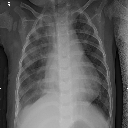

In [28]:
array_to_img(train_images[10])

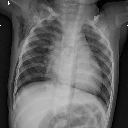

In [29]:
array_to_img(train_images[72])

## Images and Labels

In [30]:
#exploring the data set
train_ex = train_images.shape[0]
num_px = train_images.shape[1]
test_ex = test_images.shape[0]
val_ex = val_images.shape[0]

print ("Number of training samples: " + str(train_ex))
print ("Number of testing samples: " + str(test_ex))
print ("Number of validation samples: " + str(val_ex))
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))

Number of training samples: 5216
Number of testing samples: 624
Number of validation samples: 16
train_images shape: (5216, 128, 128, 1)
train_labels shape: (5216, 2)
test_images shape: (624, 128, 128, 1)
test_labels shape: (624, 2)
val_images shape: (16, 128, 128, 1)
val_labels shape: (16, 2)


>Images

In [31]:
#Reshaping the images
# train_images = train_images.reshape(500, -1).T
# test_images = test_images.reshape(125, -1).T
# val_images = val_images.reshape(8, -1).T

In [32]:
#Reshaping the images
train_images = train_images.reshape(train_images.shape[0], -1)
test_images = test_images.reshape(test_images.shape[0], -1)
val_images = val_images.reshape(val_images.shape[0], -1)

In [33]:
#Previewing the shape of train_images_unrow
print('Train Images:',np.shape(train_images))
print('Test Images:',np.shape(test_images))
print('Validation Images:',np.shape(val_images))

Train Images: (5216, 16384)
Test Images: (624, 16384)
Validation Images: (16, 16384)


>Labels

In [34]:
train_labels

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [35]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [36]:
# train_labels_final = train_labels.T[[1]]
# test_labels_final = test_labels.T[[1]]
# val_labels_final = val_labels.T[[1]]

In [37]:
train_l = np.reshape(train_labels[:,0], (5216,1))
test_l= np.reshape(test_labels[:,0], (624,1))
val_l = np.reshape(val_labels[:,0], (16,1))

In [38]:
print('Train Labels:',np.shape(train_l))
print('Test Labels:',np.shape(test_l))
print('Validation Labels:',np.shape(val_l))

Train Labels: (5216, 1)
Test Labels: (624, 1)
Validation Labels: (16, 1)


Standardizing the Data

Train Test Split

## Baseline Model

In [39]:
# Build a baseline fully connected model
np.random.seed(42)
model = models.Sequential()
model.add(layers.Dense(15, activation='relu', input_shape=(16384,))) # 1 hidden layers
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [40]:
#Creating a Compile
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['acc'])

In [41]:
#Creating History variable
history = model.fit(train_images,
                    train_l,
                    epochs=100,
                    batch_size=80,
                    validation_data=(val_images, val_l))

Epoch 1/100
66/66 [==============================] - 1s 6ms/step - loss: 0.7356 - acc: 0.6029 - val_loss: 0.6984 - val_acc: 0.5000
Epoch 2/100
66/66 [==============================] - 0s 4ms/step - loss: 0.6410 - acc: 0.7415 - val_loss: 0.7104 - val_acc: 0.5000
Epoch 3/100
66/66 [==============================] - 0s 4ms/step - loss: 0.6144 - acc: 0.7437 - val_loss: 0.7255 - val_acc: 0.5000
Epoch 4/100
66/66 [==============================] - 0s 4ms/step - loss: 0.6015 - acc: 0.7363 - val_loss: 0.7396 - val_acc: 0.5000
Epoch 5/100
66/66 [==============================] - 0s 4ms/step - loss: 0.5904 - acc: 0.7388 - val_loss: 0.7547 - val_acc: 0.5000
Epoch 6/100
66/66 [==============================] - 0s 4ms/step - loss: 0.5864 - acc: 0.7357 - val_loss: 0.7669 - val_acc: 0.5000
Epoch 7/100
66/66 [==============================] - 0s 5ms/step - loss: 0.5729 - acc: 0.7478 - val_loss: 0.7772 - val_acc: 0.5000
Epoch 8/100
66/66 [==============================] - 0s 4ms/step - loss: 0.5802 - a

66/66 [==============================] - 0s 4ms/step - loss: 0.1123 - acc: 0.9597 - val_loss: 0.4646 - val_acc: 0.8750
Epoch 64/100
66/66 [==============================] - 0s 4ms/step - loss: 0.1190 - acc: 0.9604 - val_loss: 0.1856 - val_acc: 0.9375
Epoch 65/100
66/66 [==============================] - 0s 4ms/step - loss: 0.1058 - acc: 0.9632 - val_loss: 0.4807 - val_acc: 0.8125
Epoch 66/100
66/66 [==============================] - 0s 4ms/step - loss: 0.1211 - acc: 0.9519 - val_loss: 0.2843 - val_acc: 0.9375
Epoch 67/100
66/66 [==============================] - 0s 4ms/step - loss: 0.1361 - acc: 0.9539 - val_loss: 0.2316 - val_acc: 0.8750
Epoch 68/100
66/66 [==============================] - 0s 4ms/step - loss: 0.1503 - acc: 0.9407 - val_loss: 0.3437 - val_acc: 0.8750
Epoch 69/100
66/66 [==============================] - 0s 4ms/step - loss: 0.0961 - acc: 0.9670 - val_loss: 0.5416 - val_acc: 0.7500
Epoch 70/100
66/66 [==============================] - 0s 4ms/step - loss: 0.1383 - acc: 0

In [42]:
result_train = model.evaluate(train_images, train_l)

163/163 [==============================] - 0s 2ms/step - loss: 0.0805 - acc: 0.9741


In [43]:
results_test = model.evaluate(test_images, test_l)

20/20 [==============================] - 0s 1ms/step - loss: 0.8068 - acc: 0.7532


In [44]:
result_train

[0.08050623536109924, 0.9741181135177612]

In [45]:
results_test

[0.8068307042121887, 0.7532051205635071]

## CNN

In [60]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(128, 128, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [63]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 126, 126, 32)      320       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 12, 12, 128)     

In [61]:
model.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

In [62]:
#Creating History variable
history = model.fit(train_images,
                    train_l,
                    epochs=100,
                    batch_size=80,
                    validation_data=(val_images, val_l))

Epoch 1/100


ValueError: in user code:

    D:\Users\Trevor Mott\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    D:\Users\Trevor Mott\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    D:\Users\Trevor Mott\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    D:\Users\Trevor Mott\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    D:\Users\Trevor Mott\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    D:\Users\Trevor Mott\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    D:\Users\Trevor Mott\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:754 train_step
        y_pred = self(x, training=True)
    D:\Users\Trevor Mott\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    D:\Users\Trevor Mott\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:239 assert_input_compatibility
        str(tuple(shape)))

    ValueError: Input 0 of layer sequential_12 is incompatible with the layer: : expected min_ndim=4, found ndim=2. Full shape received: (None, 16384)


In [ ]:
print(val_images.shape)